In [1]:
## Created: 6/8/22
## last edited: 6/22/22
## Status: Streamlined code found in CRL In Situ Comparison V1 (now in older-code)
##         Able to plot pitch and roll variations over crl data!
##         Copied a good bit of the data loading / manipulation process into a python script!
##         Everything in this notebook should still work, though.

In [30]:
# import packages and plotting scripts

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

import xarray as xr
from datetime import datetime
import warnings
import pandas as pd
import cartopy.crs as ccrs
import shapely.geometry as sgeom
import matplotlib.patches as mpatches
from scipy.signal import find_peaks

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots
import plot_in_situ

In [3]:
# view datasets

# paths to data
flight_path = "/Users/etmu9498/research/data/in-situ"
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"

# load data to these variables
crl_list = make_plots.load_crl(crl_path, print_files=False)
flight_list = make_plots.load_flight_level( flight_path, print_files=True )
flight_number = flight_list[32]

os.chdir(  "/Users/etmu9498/research/data/CRL_data/2021")
crl_name = crl_list[17]
crl_data = xr.open_dataset( crl_name)

# use new script to load flight level data:
xr_in_situ = plot_in_situ.load_in_situ( flight_path, flight_number, sample_step_size=10)
xr_in_situ

in situ data files:
0) 20210527H1_iwg1.txt
1) 20210713H1_iwg1.txt
2) 20210716H1_iwg1.txt
3) 20210811H1_iwg1.txt
4) 20210812H1_iwg1.txt
5) 20210812H2_iwg1.txt
6) 20210813H1_iwg1.txt
7) 20210816H1_iwg1.txt
8) 20210817H1_iwg1.txt
9) 20210818H1_iwg1.txt
10) 20210818I1_iwg1.txt
11) 20210818N1_iwg1.txt
12) 20210819H1_iwg1.txt
13) 20210819N1_iwg1.txt
14) 20210820H1_iwg1.txt
15) 20210821H1_iwg1.txt
16) 20210821H2_iwg1.txt
17) 20210827H1_iwg1.txt
18) 20210828H1_iwg1.txt
19) 20210828I1_iwg1.txt
20) 20210829H1_iwg1.txt
21) 20210829I1_iwg1.txt
22) 20210905H1_iwg1.txt
23) 20210905I1_iwg1.txt
24) 20210906I1_iwg1.txt
25) 20210913H1_iwg1.txt
26) 20210915H1_iwg1.txt
27) 20210917H1_iwg1.txt
28) 20210923H1_iwg1.txt
29) 20210925H1_iwg1.txt
30) 20210925I1_iwg1.txt
31) 20210926H1_iwg1.txt
32) 20210927H1_iwg1.txt
33) 20210929H1_iwg1.txt
34) 20210929H2_iwg1.txt
35) 20210930H1_iwg1.txt


<xarray.Dataset>
Dimensions:            (index: 3286)
Coordinates:
  * index              (index) int64 0 1 2 3 4 5 ... 3281 3282 3283 3284 3285
Data variables: (12/137)
    IWG1_NAMES         (index) object 'IWG1' 'IWG1' 'IWG1' ... 'IWG1' 'IWG1'
    TIME               (index) object '20210927T180958' ... '20210928T033138'
    LATref             (index) object '17.7002' '17.7002' ... '17.6887'
    LONref             (index) object '-64.7941' '-64.7941' ... '-64.9311'
    ALTref             (index) object '15.6' '15.5' '15.5' ... '701.0' '686.4'
    GPS_GeoidHt.3      (index) object nan nan nan nan nan ... nan nan nan nan
    ...                 ...
    dt                 (index) datetime64[ns] 2021-09-27T18:09:58 ... 2021-09...
    time               (index) object 18:09:58 18:10:08 ... 03:31:28 03:31:38
    float_time         (index) float64 18.17 18.17 18.17 ... 27.52 27.52 27.53
    str_time           (index) <U8 '18:09:58' '18:10:08' ... '03:31:38'
    rollval            (index) float64 -0.09 -0.08 -0.08 ... 14.01 -4.82 0.98
    pitchval           (index) float64 -2.6 -2.59 -2.59 -2.59 ... 1.06 0.85 1.47

In [4]:
# rename local variables for this notebook
str_time = xr_in_situ.str_time
float_time = xr_in_situ.float_time
pitch = xr_in_situ.pitchval
roll = xr_in_situ.rollval

print( type( pitch))
print( type( roll ))
print( type( float_time))
print( type( str_time))

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


In [5]:
# pitch: finding min and max values

#Find peaks
print( len( pitch))
print( int( len( pitch) / 300))
peaks = find_peaks( pitch, height = 3.0, distance = int( len( pitch) / 100)) # threshold = 1.0
height = peaks[1]['peak_heights'] #list containing the height of the peaks
str_peak_pos = np.take( str_time, peaks[0])
float_peak_pos = np.take( float_time, peaks[0])

# peaks to be plotted below!
# print( peak_pos)
# print( height)
print( peaks)

#Find minima
pitch_min = [ val * -1 for val in pitch]

minima = find_peaks( pitch_min, height = 0.0, distance = int( len( pitch) / 100))

str_min_pos = np.take( str_time, minima[0])
float_min_pos = np.take( float_time, minima[0])
min_height = np.take( pitch, minima[0]) # this might be the cleaner way to code things, change the similar line for maxima?

# print( min_pos)
# print( min_height)
print( minima)

3286
10
(array([ 538,  583,  616,  651, 1183, 1300, 1356, 1483, 1617, 1790, 1824,
       2189, 2248, 2639, 2675], dtype=int64), {'peak_heights': array([7.17, 5.41, 4.28, 3.8 , 4.77, 4.16, 3.8 , 3.18, 3.32, 3.64, 3.79,
       3.09, 3.85, 7.7 , 3.96])})
(array([  26,   63,  101,  138,  174,  212,  248,  302,  337,  372,  429,
        490,  534,  764, 1094, 1182, 1305, 1678, 1756, 1807, 2190, 2247,
       2861, 2904, 2952, 3007, 3046, 3082, 3117, 3162, 3211, 3258],
      dtype=int64), {'peak_heights': array([2.48, 2.38, 2.34, 2.3 , 2.37, 2.36, 2.35, 2.38, 2.4 , 2.38, 2.44,
       2.57, 1.98, 0.55, 1.89, 3.02, 2.99, 0.45, 0.37, 0.46, 0.05, 0.15,
       0.1 , 0.15, 0.17, 0.18, 0.2 , 0.16, 0.23, 4.38, 5.52, 2.53])})


In [6]:
# roll: finding min and max values

#Find peaks
rpeaks = find_peaks( roll, height = 10.0, distance = int( len( roll) / 100))
rheight = rpeaks[1]['peak_heights'] #list containing the height of the peaks
str_rpeak_pos = np.take( str_time, rpeaks[0])
float_rpeak_pos = np.take( float_time, rpeaks[0])
print( rpeaks)

#Find minima
roll_min = [ val * -1 for val in roll]

rminima = find_peaks( roll_min, height = 10.0, distance = int( len( roll) / 100))
str_rmin_pos = np.take( str_time, rminima[0])
float_rmin_pos = np.take( float_time, rminima[0])
rmin_height = np.take( roll, rminima[0]) # this might be the cleaner way to code things, change the similar line for maxima?
print( rminima)

(array([1083, 1550, 1591, 2467, 2577, 2928, 3269], dtype=int64), {'peak_heights': array([19.94, 15.42, 10.75, 26.06, 26.3 , 12.24, 25.59])})
(array([ 552, 1121, 1482, 1537, 1572, 1616, 1938, 2069, 2206, 2459, 3231],
      dtype=int64), {'peak_heights': array([10.01, 12.54, 27.02, 26.11, 14.02, 29.39, 27.04, 29.49, 10.33,
       25.  , 19.68])})


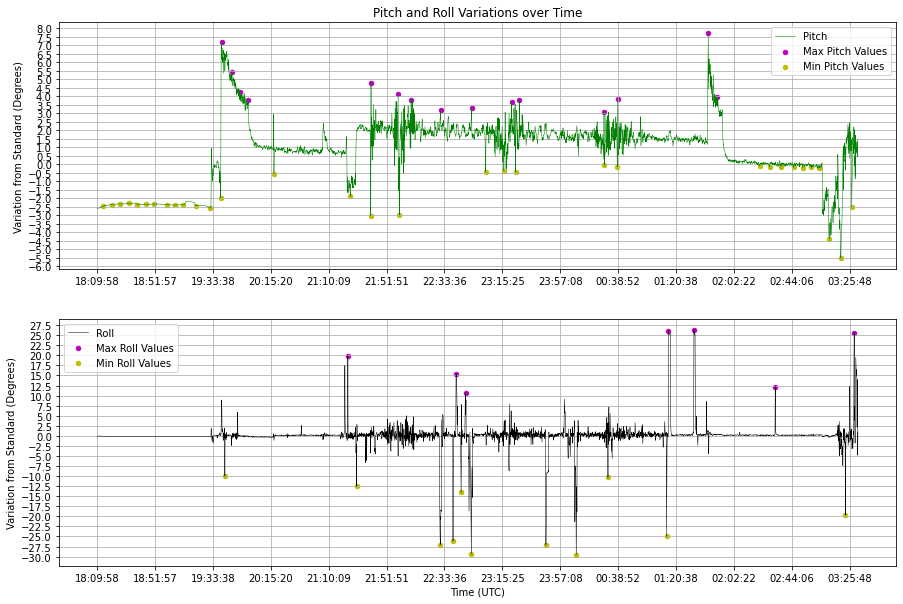

In [7]:
# plotting pitch and roll changes on top of each other to figure out turning points- labels are strings, not floats!

fig=plt.figure(1, figsize=(15, 10))

ax1 = plt.subplot( 211)
ax1.plot( str_time, pitch, label="Pitch", c='g', linewidth=.5)
ax1.scatter( str_peak_pos, height, label="Max Pitch Values", c='m', s=20)
ax1.scatter( str_min_pos, min_height, label="Min Pitch Values", c='y', s=20)

ax1.set_ylabel( "Variation from Standard (Degrees)")
ax1.set_title( 'Pitch and Roll Variations over Time')
ax1.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax1.yaxis.set_major_locator( plt.MaxNLocator( 30))
plt.grid( 'on')
plt.legend()

ax2 = plt.subplot( 212)
ax2.plot( str_time, roll, label="Roll", c='k', linewidth=.5 )
ax2.scatter( str_rpeak_pos, rheight, label="Max Roll Values", c='m', s=20)
ax2.scatter( str_rmin_pos, rmin_height, label="Min Roll Values", c='y', s=20)

ax2.set_xlabel( "Time (UTC)")
ax2.set_ylabel( "Variation from Standard (Degrees)")
ax2.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax2.yaxis.set_major_locator( plt.MaxNLocator( 30))

plt.grid( 'on')
plt.legend()

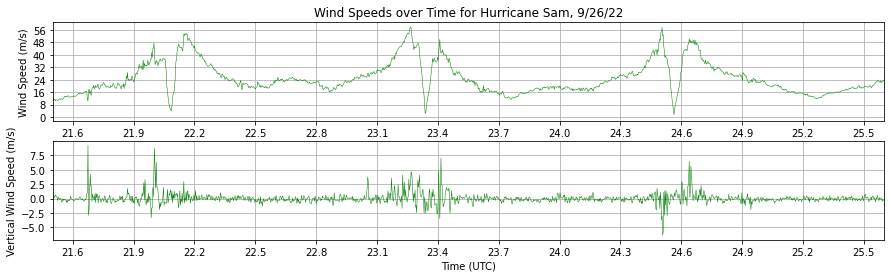

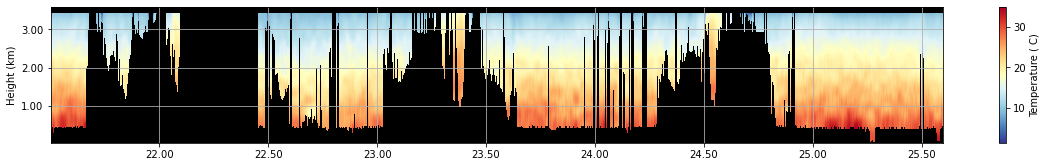

In [8]:
# plotting wind speed, direction, and vertical wind
# ws = wind speed m/s
# wd = wind direction
# uwz = vertical wind m/s

'''
print( type( xr_in_situ["WS.d"].values[0]))
ws = xr_in_situ["WS.d"].values
ws = [ float( line) for line in ws]
print( type( ws[0]))
'''

ws = xr_in_situ["WS.d"].values
ws = [ float( line) for line in ws]
wd = xr_in_situ["WD.d"].values
wd = [ float( line) for line in wd]
uwz = xr_in_situ["UWZ.d"].values
uwz = [ float( line) for line in uwz]


fig=plt.figure(1, figsize=(14.9, 4))
ax1 = plt.subplot( 211)
ax1.set_title( 'Wind Speeds over Time for Hurricane Sam, 9/26/22')


ax1.plot( float_time, ws, c='g', linewidth=.5)
ax1.set_ylabel( "Wind Speed (m/s)")
ax1.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax1.yaxis.set_major_locator( plt.MaxNLocator( 8))
plt.xlim( [crl_data.time[0], crl_data.time[-1] ])

plt.grid( 'on')

'''
ax2 = plt.subplot( 312)
ax2.plot( float_time, wd, c='g', linewidth=.5)
ax2.set_ylabel( "Wind Direction ( Degrees)")
ax2.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax2.yaxis.set_major_locator( plt.MaxNLocator( 15))
plt.xlim( [crl_data.time[0], crl_data.time[-1] ])
plt.grid( 'on')
plt.legend()
'''

ax3 = plt.subplot( 212)
ax3.plot( float_time, uwz, c='g', linewidth=.5)
ax3.set_ylabel( "Vertical Wind Speed (m/s)")
ax3.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax3.yaxis.set_major_locator( plt.MaxNLocator( 8))
plt.xlim( [crl_data.time[0], crl_data.time[-1] ])
plt.grid( 'on')
ax3.set_xlabel( "Time (UTC)")

plt.figure( figsize=(20, 2.5))
make_plots.plot_T( crl_path, crl_name, 0, len( crl_data.time) - 1, 'time')


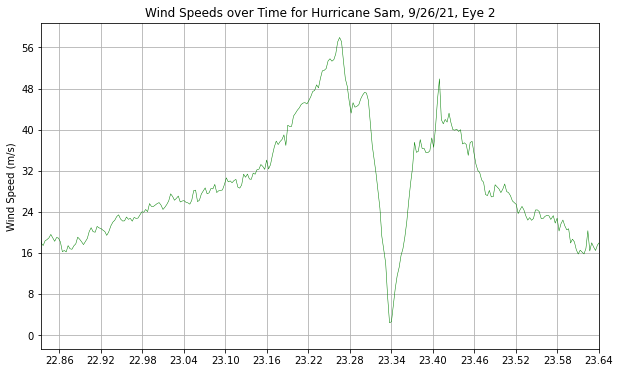

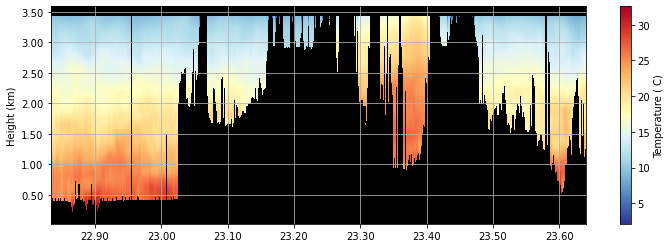

In [9]:
# same as the plot above, but zoomed in on different eyewall segments

ws = xr_in_situ["WS.d"].values
ws = [ float( line) for line in ws]
wd = xr_in_situ["WD.d"].values
wd = [ float( line) for line in wd]
uwz = xr_in_situ["UWZ.d"].values
uwz = [ float( line) for line in uwz]


fig=plt.figure(1, figsize=( 10, 6))
ax1 = plt.subplot( )
ax1.set_title( 'Wind Speeds over Time for Hurricane Sam, 9/26/21, Eye 2')


ax1.plot( float_time, ws, c='g', linewidth=.5)
ax1.set_ylabel( "Wind Speed (m/s)")
ax1.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax1.yaxis.set_major_locator( plt.MaxNLocator( 8))
plt.xlim( [crl_data.time[2350], crl_data.time[3800] ])

plt.grid( 'on')


plt.figure( figsize=(12, 4))
make_plots.plot_T( crl_path, crl_name, 2350, 3800, 'time')


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_17656\2319189486.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh( float_time, [in_situ_height - offset, in_situ_height + offset], [ws, ws], cmap = in_situ_cmap,


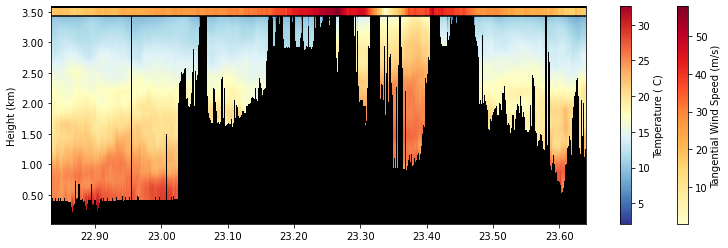

In [38]:
# the same plot as above, but the tangential wind speeds are displayed as a colorbar on top of crl data
# zhien plots this data beneath the crl data, but I kinda like showing it at flight level, where it was collected!

# ws = wind speed m/s
# wd = wind direction
# uwz = vertical wind m/s

'''
fig=plt.figure(1, figsize=( 10, .2))
ax1 = plt.subplot( )
ax1.set_title( 'Wind Speeds over Time for Hurricane Sam, 9/26/21, Eye 2')


ax1.plot( float_time, ws, c='g', linewidth=.5)
ax1.set_ylabel( "Wind Speed (m/s)")
ax1.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax1.yaxis.set_major_locator( plt.MaxNLocator( 8))
plt.xlim( [crl_data.time[2350], crl_data.time[3800] ])
plt.grid( 'on')
'''

plt.figure( figsize=(12, 4))
make_plots.plot_T( crl_path, crl_name, 2350, 3800, 'time')

in_situ_height = 3.50 # assumed height of the P3: maybe make this variable?
offset = .03
line_offset = 2
in_situ_cmap = 'YlOrRd'
w_min = np.min( ws)
w_max = np.max( ws)

# plot in situ data above crl data in blank spot at flight level where crl data is missing
plt.pcolormesh( float_time, [in_situ_height - offset, in_situ_height + offset], [ws, ws], cmap = in_situ_cmap,
               vmin= w_min, vmax= w_max)
# make a black line separating in situ and crl data
plt.axhline( y= in_situ_height - line_offset * offset, c='k')

# trying to place the colorbar closer to the figure
x_cbar_0, y_cbar_0, x_cbar_size, y_cbar_size     = .85, 0.125, 0.0125, 0.755
ax_cbar = plt.gcf().add_axes([x_cbar_0, y_cbar_0, x_cbar_size, y_cbar_size])

map = mpl.cm.ScalarMappable(cmap= in_situ_cmap, norm=mpl.colors.Normalize( vmin= w_min, vmax= w_max))
# cbar = fig.colorbar(mappable = map, label="Temperature ( C)")


cbar_winds = plt.gcf().colorbar( mappable=map, cax=ax_cbar, orientation='vertical', label='Tangential Wind Speed (m/s)')

(21.50040054321289, 25.59964942932129)

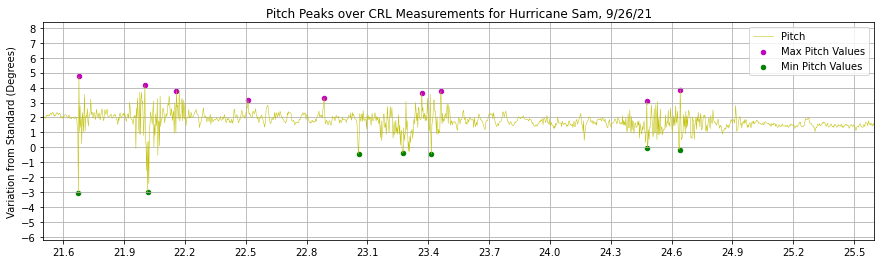

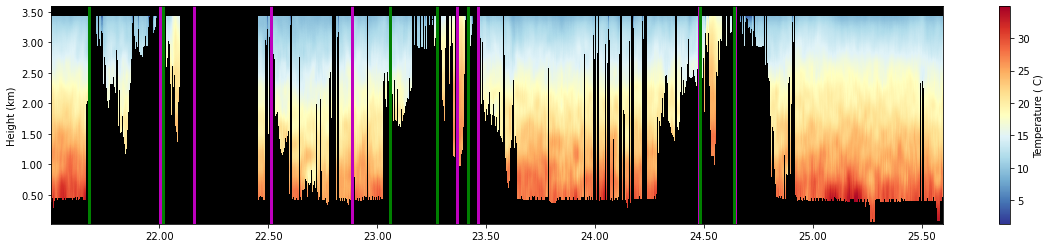

In [16]:
fig=plt.figure(1, figsize=(14.9, 4))

ax1 = plt.subplot( 111)
ax1.plot( float_time, pitch, label="Pitch", c='y', linewidth=.5)
ax1.scatter( float_peak_pos, height, label="Max Pitch Values", c='m', s=20)
ax1.scatter( float_min_pos, min_height, label="Min Pitch Values", c='g', s=20)

ax1.set_ylabel( "Variation from Standard (Degrees)")
ax1.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax1.yaxis.set_major_locator( plt.MaxNLocator( 15))
plt.grid( 'on')
plt.legend()
plt.xlim( [crl_data.time[0], crl_data.time[-1] ]) # these limits line up with crl plot below
plt.title("Pitch Peaks over CRL Measurements for Hurricane Sam, 9/26/21") # , 9/26/21")

# make lines on crl plots where min and max pitch values are found!
# sam 9/26, all crl data
plt.figure( figsize=(20, 4))
make_plots.plot_T( crl_path, crl_name, 0, len( crl_data.time) - 1, 'time')

for pitchx in float_peak_pos:
    plt.axvline( x = pitchx, c = 'm', label='Max Pitch', linewidth=3.0)
for pitchx in float_min_pos:
    plt.axvline( x = pitchx, c = 'g', label='Min Pitch', linewidth=3.0)
plt.grid(False)
plt.xlim( [crl_data.time[0], crl_data.time[-1] ])


(21.50040054321289, 25.59964942932129)

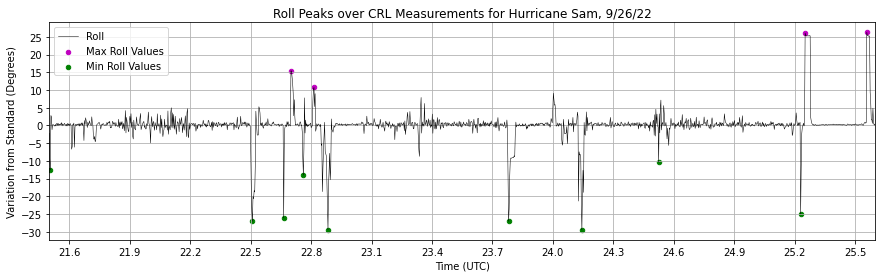

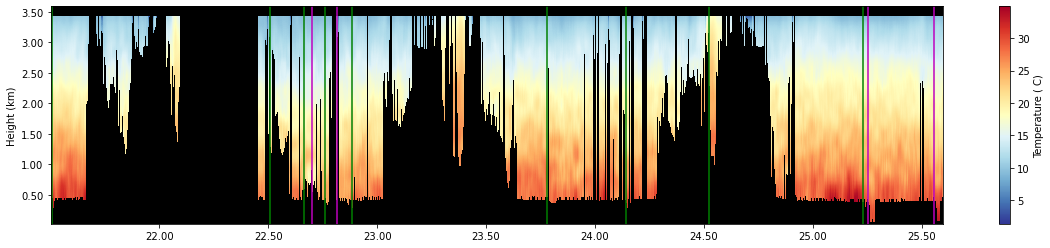

In [17]:
# the same plot as above but for roll
plt.figure( figsize=(14.8, 4))
plt.title("Roll Peaks over CRL Measurements for Hurricane Sam, 9/26/22") # , 9/26/21")

ax2 = plt.subplot( 111)
ax2.plot( float_time, roll, label="Roll", c='k', linewidth=.5 )
ax2.scatter( float_rpeak_pos, rheight, label="Max Roll Values", c='m', s=20)
ax2.scatter( float_rmin_pos, rmin_height, label="Min Roll Values", c='g', s=20)

ax2.set_xlabel( "Time (UTC)")
ax2.set_ylabel( "Variation from Standard (Degrees)")
ax2.xaxis.set_major_locator( plt.MaxNLocator( 15))
ax2.yaxis.set_major_locator( plt.MaxNLocator( 15))

plt.grid( 'on')
plt.legend()
plt.xlim( [crl_data.time[0], crl_data.time[-1] ])

plt.figure( figsize=(20, 4))
make_plots.plot_T( crl_path, crl_name, 0, len( crl_data.time) - 1, 'time')

for rollx in float_rpeak_pos:
    plt.axvline( x = rollx, c = 'm', label='Max Roll', linewidth=1.5)
for rollx in float_rmin_pos:
    plt.axvline( x = rollx, c = 'g', label='Min Roll', linewidth=1.5)
plt.grid( False)
plt.xlim( [crl_data.time[0], crl_data.time[-1] ])
